In [188]:
import glob
import pandas as pd

AV1 = pd.concat([pd.read_csv(f, sep=',', na_values=".") for f in glob.glob('AV1/*.csv')], ignore_index=True)
VP9 = pd.concat([pd.read_csv(f, sep=',', na_values=".") for f in glob.glob('VP9/*.csv')], ignore_index=True)
H264 = pd.concat([pd.read_csv(f, sep=',', na_values=".") for f in glob.glob('H264/*.csv')], ignore_index=True)
HEVC = pd.concat([pd.read_csv(f, sep=',', na_values=".") for f in glob.glob('HEVC/*.csv')], ignore_index=True)

AV1.set_axis(['Time', 'Total', 'CPU', 'Monitor', 'Disk', 'Base', 'App', 'Codec'], axis='columns', inplace=True)
VP9.set_axis(['Time', 'Total', 'CPU', 'Monitor', 'Disk', 'Base', 'App', 'Codec'], axis='columns', inplace=True)
H264.set_axis(['Time', 'Total', 'CPU', 'Monitor', 'Disk', 'Base', 'App', 'Codec'], axis='columns', inplace=True)
HEVC.set_axis(['Time', 'Total', 'CPU', 'Monitor', 'Disk', 'Base', 'App', 'Codec'], axis='columns', inplace=True)

#print("{} is {} {}".format("Total CPU power consumption of AV1", AV1['App'].sum(), 'W'))
print(AV1['App'].describe())
print("\n")
#print("{} is {} {}".format("Total CPU power consumption of VP9", VP9['App'].sum(), 'W'))
print(VP9['App'].describe())
print("\n")
#print("{} is {} {}".format("Total CPU power consumption of H.264", H264['App'].sum(), 'W'))
print(H264['App'].describe())
print("\n")
#print("{} is {} {}".format("Total CPU power consumption of HEVC", HEVC['App'].sum(), 'W'))
print(HEVC['App'].describe())
print("\n")

count    1532.000000
mean        5.097454
std         2.285392
min         0.000000
25%         3.900000
50%         5.200000
75%         6.700000
max        10.300000
Name: App, dtype: float64


count    1470.000000
mean        0.156122
std         0.101721
min         0.000000
25%         0.100000
50%         0.100000
75%         0.200000
max         1.100000
Name: App, dtype: float64


count    1513.000000
mean        0.127495
std         0.179719
min         0.000000
25%         0.000000
50%         0.100000
75%         0.200000
max         1.100000
Name: App, dtype: float64


count    1503.000000
mean        0.119162
std         0.173336
min         0.000000
25%         0.000000
50%         0.000000
75%         0.200000
max         1.100000
Name: App, dtype: float64




In [278]:
import glob
import pandas as pd
import numpy as np

AV1_App_means = []
AV1 = pd.DataFrame()

for x in range(1,11):
   AV1 = AV1.append(pd.read_csv('AV1/AV1-'+str(x)+'.csv', sep=',', na_values="."), ignore_index=False)
   AV1_App = float(AV1.loc[:," Application (W)"].sum())
   AV1_App_means = np.append(AV1_App_means, AV1_App)
print("{} is {} {}".format("The mean CPU power consumption of AV1 video streaming", np.mean(AV1_App_means), 'W'))
###################################################################
VP9_App_means = []
VP9 = pd.DataFrame()

for x in range(1,11):
   VP9 = VP9.append(pd.read_csv('VP9/VP9-'+str(x)+'.csv', sep=',', na_values="."), ignore_index=False)
   VP9_App = float(VP9.loc[:," Application (W)"].sum())
   VP9_App_means = np.append(VP9_App_means, VP9_App)
print("{} is {} {}".format("The mean CPU power consumption of VP9 video streaming", np.mean(VP9_App_means), 'W'))
###################################################################
H264_App_means = []
H264 = pd.DataFrame()

for x in range(1,11):
   H264 = H264.append(pd.read_csv('H264/X264-'+str(x)+'.csv', sep=',', na_values="."), ignore_index=False)
   H264_App = float(H264.loc[:," Application (W)"].sum())
   H264_App_means = np.append(H264_App_means, H264_App)
print("{} is {} {}".format("The mean CPU power consumption of H.264 video streaming", np.mean(H264_App_means), 'W'))
###################################################################
HEVC_App_means = []
HEVC = pd.DataFrame()

for x in range(1,11):
   HEVC = HEVC.append(pd.read_csv('HEVC/X265-'+str(x)+'.csv', sep=',', na_values="."), ignore_index=False)
   HEVC_App = float(HEVC.loc[:," Application (W)"].sum())
   HEVC_App_means = np.append(HEVC_App_means, HEVC_App)
print("{} is {} {}".format("The mean CPU power consumption of HEVC video streaming", np.mean(HEVC_App_means), 'W'))

The mean CPU power consumption of AV1 video streaming is 4297.15 W
The mean CPU power consumption of VP9 video streaming is 128.74 W
The mean CPU power consumption of H.264 video streaming is 118.57000000000001 W
The mean CPU power consumption of HEVC video streaming is 110.85 W


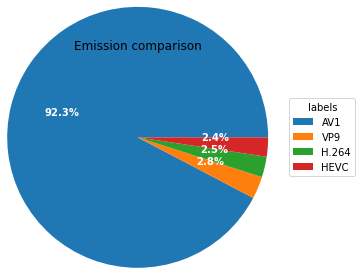

In [276]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))


sizes = [1.001837551, 0.0300144436, 0.0276434098, 0.025843569]
labels = 'AV1', 'VP9', 'H.264', 'HEVC'


def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n".format(pct, absolute)

wedges, texts, autotexts = ax.pie(sizes, autopct=lambda pct: func(pct, sizes), radius=2,
                                  textprops=dict(color="w"))

ax.legend(wedges, labels,
          title="labels",
          loc="center left",
          bbox_to_anchor=(1.4, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Emission comparison")

plt.show()

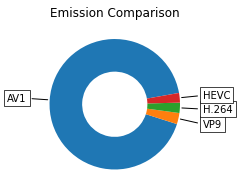

In [279]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

sizes = [1.001837551, 0.0300144436, 0.0276434098, 0.025843569]
label = 'AV1', 'VP9', 'H.264', 'HEVC'

wedges, texts = ax.pie(sizes, wedgeprops=dict(width=0.5), startangle=10)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")


for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(label[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Emission Comparison")

plt.show()

In [277]:
import glob
import pandas as pd

AV1 = pd.concat([pd.read_csv(f, sep=',', na_values=".") for f in glob.glob('AV1/*.csv')], ignore_index=True)
VP9 = pd.concat([pd.read_csv(f, sep=',', na_values=".") for f in glob.glob('VP9/*.csv')], ignore_index=True)
H264 = pd.concat([pd.read_csv(f, sep=',', na_values=".") for f in glob.glob('H264/*.csv')], ignore_index=True)
HEVC = pd.concat([pd.read_csv(f, sep=',', na_values=".") for f in glob.glob('HEVC/*.csv')], ignore_index=True)

AV1.set_axis(['Time', 'Total', 'CPU', 'Monitor', 'Disk', 'Base', 'App', 'Codec'], axis='columns', inplace=True)
VP9.set_axis(['Time', 'Total', 'CPU', 'Monitor', 'Disk', 'Base', 'App', 'Codec'], axis='columns', inplace=True)
H264.set_axis(['Time', 'Total', 'CPU', 'Monitor', 'Disk', 'Base', 'App', 'Codec'], axis='columns', inplace=True)
HEVC.set_axis(['Time', 'Total', 'CPU', 'Monitor', 'Disk', 'Base', 'App', 'Codec'], axis='columns', inplace=True)

#print("{} is {} {}".format("Total CPU power consumption of AV1", AV1['App'].sum(), 'W'))
print(AV1['Total'].describe())
print("\n")
#print("{} is {} {}".format("Total CPU power consumption of VP9", VP9['App'].sum(), 'W'))
print(VP9['Total'].describe())
print("\n")
#print("{} is {} {}".format("Total CPU power consumption of H.264", H264['App'].sum(), 'W'))
print(H264['Total'].describe())
print("\n")
#print("{} is {} {}".format("Total CPU power consumption of HEVC", HEVC['App'].sum(), 'W'))
print(HEVC['Total'].describe())
print("\n")

count    1532.000000
mean       27.357898
std         2.655172
min        21.000000
25%        25.800000
50%        27.300000
75%        29.100000
max        35.700000
Name: Total, dtype: float64


count    1470.000000
mean       21.872449
std         0.857893
min        21.000000
25%        21.500000
50%        21.700000
75%        22.000000
max        33.400000
Name: Total, dtype: float64


count    1513.000000
mean       22.621613
std         1.788274
min        21.000000
25%        21.800000
50%        22.100000
75%        22.500000
max        38.300000
Name: Total, dtype: float64


count    1503.000000
mean       22.597871
std         2.287457
min        21.000000
25%        21.500000
50%        21.800000
75%        22.300000
max        42.500000
Name: Total, dtype: float64


